# <font style="color:rgb(50,120,229)">Gaussian Blur</font>

The box kernel explained in the previous section, weights the contribution of all pixels in the neighborhood equally. A Gaussian Blur kernel, on the other hand, weights the contribution of a neighboring pixel based on the distance of the pixel from the center pixel.

Remember the friendly bell-curve that made your grades look good as long as everybody else performed poorly on their tests? The bell-curve or the Gaussian is given by the following equation.
$$
G(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp^{-\frac{x^2}{2\sigma^2}}
$$
The shape of the curve is controlled a single parameter called $\sigma$  that controls the peakiness of the bell curve.
$$
G(x,\;y) = \frac{1}{2\pi\sigma^2}\exp^{-\frac{x^2 \;+ \;y^2}{2\sigma^2}}
$$

The Gaussian kernel is based on the same equation, except it is in 2D. Instead of a curve, you can think of an upside down bowl. A bigger $\sigma$ creates a kernel that blurs more. 

A 5x5 Gaussian kernel with ${\sigma}=1$ is given by 

$$\frac{1}{337} \begin{bmatrix} 1 & 4 & 7 & 4 & 1 \\ 4 & 20 & 33 & 20 & 4 \\
7 & 33 & 55 & 33 & 7 \\ 4 & 20 & 33 & 20 & 4 \\ 1 & 4 & 7 & 4 & 1 \end{bmatrix}$$

Unlike the box kernel, the Gaussian kernel is not uniform. The middle pixel gets the maximum weight while the pixels farther away are given less weight. 

An image blurred using the Gaussian kernel looks less blurry compared to a box kernel of the same size. Small amount of Gaussian blurring is frequently used to remove noise from an image. It is also applied to the image prior to a noise sensitive image filtering operations. For example, the Sobel kernel used for calculating the derivative of an image is a combination of a Gaussian kernel and a finite difference kernel. 

## <font style="color:rgb(50,120,229)">Gaussian Filter in OpenCV</font>

In OpenCV, the [**`GaussianBlur`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1) function is used to perform blurring. Let us look at the usage.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv2.GaussianBlur(	src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]	)
```

**Parameters**

- **`src`**	input image; the image can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- **`dst`**	output image of the same size and type as src.
- **`ksize`**	Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be zero's and then they are computed from sigma.
- **`sigmaX`**	Gaussian kernel standard deviation in X direction.
- **`sigmaY`**	Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height, respectively; to fully control the result regardless of possible future modifications of all this semantics, it is recommended to specify all of ksize, sigmaX, and sigmaY.
- **`borderType`**	pixel extrapolation method.


#### <font style="color:rgb(200,0,0)">Note:</font>

1. In most cases, sigmaX and sigmaY are the same. But it is fun to experiment with different values of `sigmaX` and `sigmaY` and see the results. 

2. It is much easier to control the Gaussian blurring using just one parameter. Usually, we simply provide the kernel size, and let OpenCV automatically calculate the optimum sigma for based on the following equation.  

    $$\sigma = 0.3 \cdot ((\text{size}-1) \cdot 0.5 - 1) + 0.8$$

3. If you set `sigmaY` equal to zero, it is set to `sigmaX` internally by OpenCV. If both `sigmaX` and `sigmaY` are zero, the above formula is used to calculate $\sigma$. 

Let us dive into a tutorial demonstrating the usage of Gaussian blur.

In [1]:
import cv2
import numpy as np
from dataPath import DATA_PATH

filename = DATA_PATH+"images/gaussian-noise.png"

img = cv2.imread(filename)

In the following code, Gaussian blur is applied using two different kernels.

The first is a 5x5 kernel with `sigmaX` and `sigmaY` set to 0. OpenCV automatically calculates `sigma` when it is set to 0.

The second is a 25x25 kernel with `sigmaX` and `sigmaY` set to 50.

In [2]:
# Apply gaussian blur
dst1=cv2.GaussianBlur(img,(5,5),0,0)
dst2=cv2.GaussianBlur(img,(25,25),50,50)

lineType=4
fontScale=1

# Display images

combined = np.hstack((img, dst1,dst2))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

Text(0.5, 1.0, 'Gaussian Blur Result 2 : KernelSize = 25')

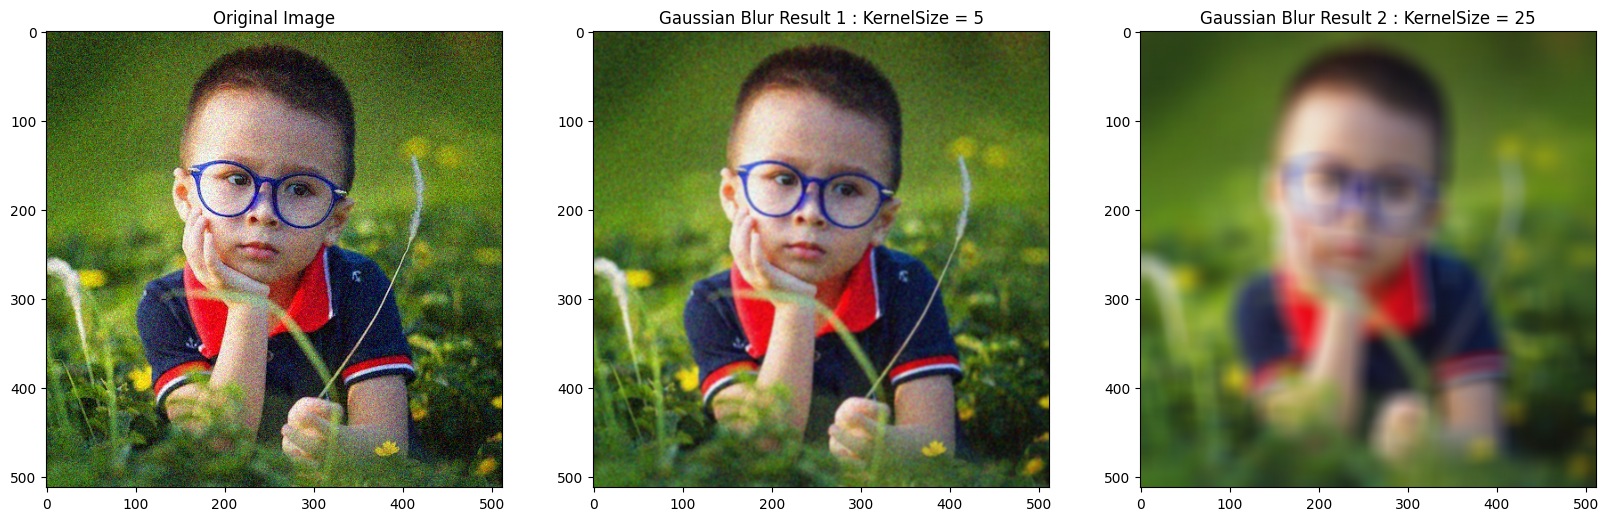

In [5]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(img[...,::-1]);plt.title("Original Image")
plt.subplot(132);plt.imshow(dst1[...,::-1]);plt.title("Gaussian Blur Result 1 : KernelSize = 5")
plt.subplot(133);plt.imshow(dst2[...,::-1]);plt.title("Gaussian Blur Result 2 : KernelSize = 25")